In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import spatial
from collections import Counter
import seaborn as sns

In [2]:
##generate samples from a mixture of gaussians

#first - for each of 500 obs, choose which dist we're working with, based on mixture coefficients
a = np.random.uniform(size = 500)
gaussian_choice = [0 if i <= 0.2 else 1 if i <= 0.7 else 2 for i in a]

data = [np.random.multivariate_normal([0,0], [[1,0],[0,1]]) if N_i == 0 else np.random.multivariate_normal([3,0], [[1,0],[0,1]]) if N_i == 1 else np.random.multivariate_normal([0,3], [[1,0],[0,1]]) for N_i in gaussian_choice]
data = np.array(data)

head of data:
[[ 2.35053259 -1.11671717]
 [ 2.52767354  1.22785031]
 [ 0.46880619  1.36323567]
 [ 1.50158144 -0.75201463]]


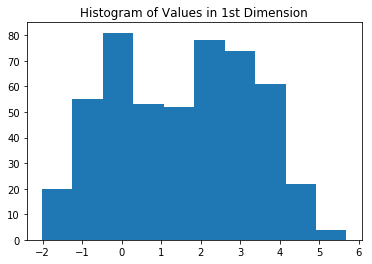

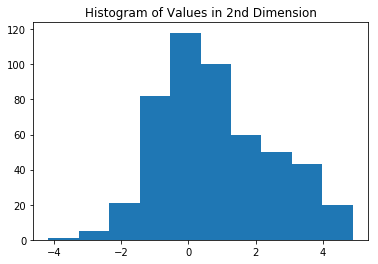

In [3]:
#Let's look at the data we generated
print("head of data:")
print(data[1:5])

plt.hist([x[0] for x in data])
plt.title("Histogram of Values in 1st Dimension")
plt.show()

plt.hist([x[1] for x in data])
plt.title("Histogram of Values in 2nd Dimension")
plt.show()

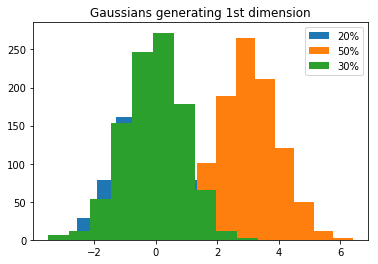

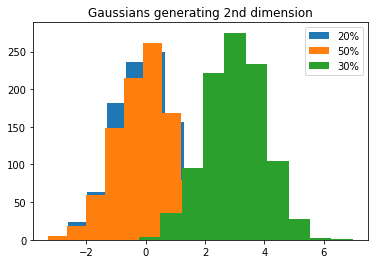

In [4]:
#Let's look at the underlying Gaussians, for intuition and sanity check
a = np.random.multivariate_normal([0,0], [[1,0],[0,1]], size = 1000)
b = np.random.multivariate_normal([3,0], [[1,0],[0,1]], size = 1000)
c = np.random.multivariate_normal([0,3], [[1,0],[0,1]], size = 1000)

plt.hist([x[0] for x in a])
plt.hist([x[0] for x in b])
plt.hist([x[0] for x in c])
plt.legend(["20%", "50%", "30%"])
plt.title("Gaussians generating 1st dimension")
plt.show()

plt.hist([x[1] for x in a])
plt.hist([x[1] for x in b])
plt.hist([x[1] for x in c])
plt.legend(["20%", "50%", "30%"])
plt.title("Gaussians generating 2nd dimension")
plt.show()

In [10]:
##Implement K-means

'''def initialize_means(data, K):
    #data is 2d, rows are observations
    #K is number of desired clusters
    mean0 = np.percentile(data[:,0], [i for i in np.arange(0, 100, 100/K)]) #will initialize to K evenly spaced percentiles of data
    mean1 = np.percentile(data[:,1], [i for i in np.arange(0, 100, 100/K)]) #will initialize to K evenly spaced percentiles of data
    centroids = np.transpose(np.array([mean0, mean1]))
    return(centroids) #returns centroids along the rows of an ndarray'''

def initialize_means(data, K):
    #data is 2d, rows are observations
    #K is number of desired clusters
    #initialize to means of random samplings of data
    sample_size = math.floor(len(data)/K)
    centroids = [np.mean(data[np.random.randint(0, len(data), size=sample_size),:], axis = 0) for i in range(K)];
    centroids = np.array(centroids)
    return(centroids) #returns centroids along the rows of an ndarray

def update_c(data, means):
    #returns a vector of c(i)'s
    dists = spatial.distance.cdist(data, np.array(means))
    c_i = [np.argmin(row) for row in dists]
    return(c_i)

def update_u(data, c):
    data = pd.DataFrame(data)
    data_c = pd.concat([data, pd.DataFrame(c, columns = ["cluster"])], axis = 1)
    data_grouped = data_c.groupby('cluster')
    means = data_grouped.mean() 
    means = means.reset_index()
    means = means.loc[:,[0,1]]
    return(means)

def run_Kmeans(N_iter, data, K):
    #objective_value = []
    per_N_objective = []
    u = initialize_means(data, K)
    for i in range(N_iter):
        c = update_c(data, u)
        u = update_u(data, c)
        per_N_objective.append(Kmeans_objective(data, c, u))
        #objective_value = objective_value + per_N_objective
    return(c, per_N_objective)

def Kmeans_objective(data, labels, centroids):
    #centroids is a pd data frame
    obj = 0
    for cluster_label in np.unique(labels):
        thisbool = np.equal(labels, cluster_label)
        dists = spatial.distance.cdist(data[thisbool,], np.array(centroids)[cluster_label,].reshape(1,-1))
        obj = obj + np.sum(np.square(dists)) #sum over all i in cluster {that's the np.sum} and over all clusters {that's the '+'}
    return(obj)


In [11]:
results = [run_Kmeans(20, data, K) for K in [2,3,4,5]] 
obj_fun_values = [r[1] for r in results]

In [12]:
print(len(obj_fun_values))
#print(obj_fun_values)
print(len(obj_fun_values[0]))
print(len(obj_fun_values[1]))
print(len(obj_fun_values[2]))
print(len(obj_fun_values[3]))

4
20
20
20
20


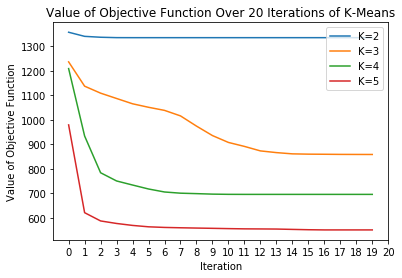

In [13]:
plt.plot(range(20), obj_fun_values[0])
plt.plot(range(20), obj_fun_values[1])
plt.plot(range(20), obj_fun_values[2])
plt.plot(range(20), obj_fun_values[3])
plt.legend(['K=2', 'K=3', 'K=4', 'K=5'])
plt.title("Value of Objective Function Over 20 Iterations of K-Means")
plt.xlabel("Iteration")
plt.ylabel("Value of Objective Function")
plt.xticks(range(21))
plt.show()

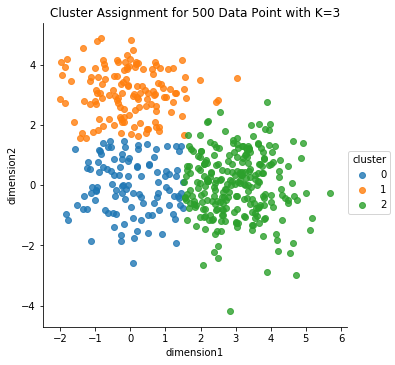

In [14]:
K3_results = pd.DataFrame(results[1][0], columns=["cluster"])
toplot = pd.concat([pd.DataFrame(data, columns=['dimension1', 'dimension2']), K3_results], axis = 1)

sns.lmplot( x="dimension1", y="dimension2", fit_reg=False, data=toplot, hue='cluster', legend=True)
plt.title("Cluster Assignment for 500 Data Point with K=3")
plt.show()

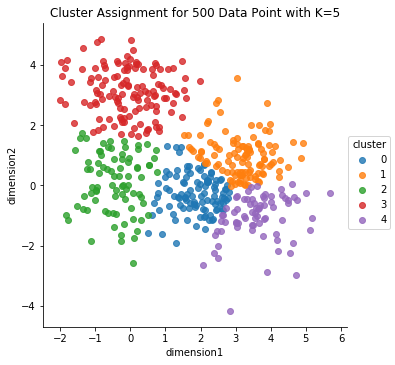

In [15]:
K5_results = pd.DataFrame(results[3][0], columns=["cluster"])
toplot = pd.concat([pd.DataFrame(data, columns=['dimension1', 'dimension2']), K5_results], axis = 1)

sns.lmplot( x="dimension1", y="dimension2", fit_reg=False, data=toplot, hue='cluster', legend=True)
plt.title("Cluster Assignment for 500 Data Point with K=5")
plt.show()